In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from astropy import units as u
import numpy as np

import time
import sys
sys.path.insert(0, '../../')
import setigen as stg
import blimpy as bl
import os
import os.path
from blimpy import Waterfall

/Users/bryanbrzycki/anaconda3/envs/seti/lib/python3.7/site-packages/h5py/__init__.py:40: UserWarning: h5py is running against HDF5 1.10.4 when it was built against 1.10.5, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


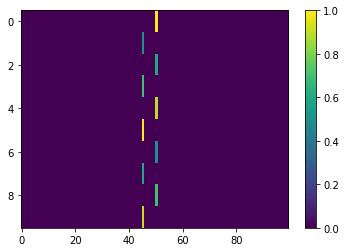

In [111]:
t_profile = [1, 0.5, 0.6, 0.7, 0.9]*2

frame = stg.Frame(tchans=10, fchans=100, dt=1, df=1)

frame.add_signal([frame.fs[50], 
                  frame.fs[45]]*5,
                 t_profile,
                 stg.box_f_profile(width=2),
                 stg.constant_bp_profile(level=1))

plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()
plt.show()

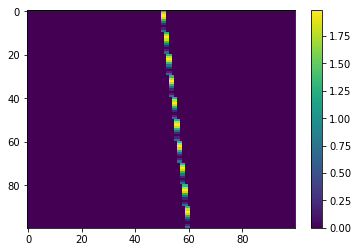

In [105]:
t_profile = [1, 0]*5

frame = stg.Frame(tchans=100, fchans=100, dt=1, df=1)

frame.add_signal(stg.constant_path(f_start=frame.fs[50], 
                                   drift_rate=0.1*u.Hz/u.s),
                 stg.sine_t_profile(period=10),
                 stg.box_f_profile(width=2),
                 stg.constant_bp_profile(level=1),
                integrate_time=True, mean_f_position=True)

plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()
plt.show()

In [27]:
callable(lambda x: x[1])

True

In [31]:
np.transpose(np.array(t_profile)[np.newaxis, :])

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0]])

In [37]:
np.transpose(np.repeat(np.array(t_profile)[np.newaxis, :], 4, axis=0))

array([[1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 0]])

In [99]:
np.full((5,), 2)

array([2, 2, 2, 2, 2])

In [50]:
np.array([1,2,3]) + np.array([2, 3])

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

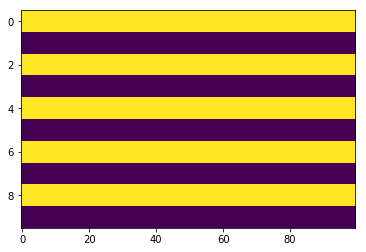

In [103]:
plt.imshow(np.meshgrid(frame.fs, t_profile)[1], aspect='auto')

In [64]:
np.sum(np.reshape(np.full((4,4), 1), (2, 8)), axis=1)

array([8, 8])

In [80]:
np.linspace(0.,2*2., 2*10).shape

(20,)

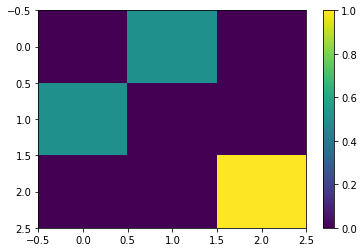

In [146]:
frame = stg.Frame(tchans=3, fchans=3, dt=1, df=1, fch1=3)

frame.add_signal(path=[1, 0, 2],
                 t_profile=[1, 0.5, 1],
                 f_profile=stg.box_f_profile(width=1),
                 bp_profile=[1, 0.5, 1])

plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()
plt.show()

In [147]:
frame.data

array([[0. , 0.5, 0. ],
       [0.5, 0. , 0. ],
       [0. , 0. , 1. ]])

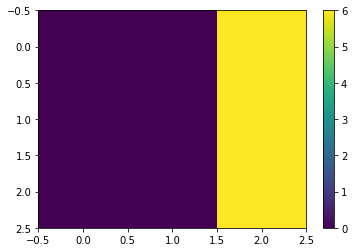

In [148]:
frame = stg.Frame(tchans=3, fchans=3, dt=1, df=1, fch1=3)

frame.add_signal(path=2,
                 t_profile=2,
                 f_profile=stg.box_f_profile(width=1),
                 bp_profile=3)

plt.imshow(frame.get_data(), aspect='auto')
plt.colorbar()
plt.show()

In [149]:
frame.get_data()

array([[0., 0., 6.],
       [0., 0., 6.],
       [0., 0., 6.]])

In [145]:
np.array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 2.]])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 2.]])